<h1>Chapter 3 | Case Study C1 | <b>Measuring Home Team Advantage in Football</b></h1>
<p>Our goal in this notebook is to provide a descriptive analysis of the <b>distribution and summary statistics</b> regarding the idea of home team advantage in footbal. The dataset used for this case is the <code>football</code> dataset from the English Premier League - see Chapter 2 for previous analyses made on it. Our main question is: 
<ul>
<i>Do professional football teams playing in their <b>home</b> stadium have an advantage? What is the extent of that advantage?</i></p>
</ul>
<p>With no further ado, let's move on and get our hands dirty!</p>
<h2><b>PART A</b> | Read the data</h2>

In [1]:
import os
import sys
import warnings
import pandas as pd
import numpy as np
from mizani.formatters import percent_format
from plotnine import *
from scipy.stats import norm

warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 500)

In [3]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

#  Get location folders
data_in = f"{dirname}da_data_repo/football/clean/"
data_out = f"{dirname}da_case_studies/ch03-football_home_advantage/"
output = f"{dirname}da_case_studies/ch03-football_home_advantage/output/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [4]:
# Import the prewritten helper functions
from py_helper_functions import *

In [5]:
df = pd.read_csv(f"{data_in}epl_games.csv")

<p>We need to get the same data used in the previous chapter, that is, the games in the 2016,2017 season. Each pair of teams plays twice, once in the home stadium of one team, and once in the home stadium of the other team. We are supposed to get a total of 380 games, hence N= 380.

In [6]:
df = df.loc[df["season"] == 2016, :].reset_index(drop=True)

In [7]:
df.shape

(380, 9)

In [8]:
df.head()

div  season       date       team_home   team_away  points_home  \
0  E0    2016  13aug2016   Middlesbrough       Stoke            1   
1  E0    2016  13aug2016         Burnley     Swansea            0   
2  E0    2016  13aug2016         Everton   Tottenham            1   
3  E0    2016  13aug2016  Crystal Palace   West Brom            0   
4  E0    2016  13aug2016        Man City  Sunderland            3   

   points_away  goals_home  goals_away  
0            1           1           1  
1            3           0           1  
2            1           1           1  
3            3           0           1  
4            0           2           1

<p>Now, we can create a new variable <code>"home_goaladv"</code> to answer our question.</p>

In [9]:
df["home_goaladv"] = df["goals_home"] - df["goals_away"]

In [10]:
df.head().T

0          1          2               3           4
div                      E0         E0         E0              E0          E0
season                 2016       2016       2016            2016        2016
date              13aug2016  13aug2016  13aug2016       13aug2016   13aug2016
team_home     Middlesbrough    Burnley    Everton  Crystal Palace    Man City
team_away             Stoke    Swansea  Tottenham       West Brom  Sunderland
points_home               1          0          1               0           3
points_away               1          3          1               3           0
goals_home                1          0          1               0           2
goals_away                1          1          1               1           1
home_goaladv              0         -1          0              -1           1

<p>Before visualizing the distribution of goal difference in games, let's return Table 3.7 from the book. It describes the home team-away team goal difference.</p>

In [11]:
pd.DataFrame.from_dict(
    {
        "Statistics": [
            "Mean",
            "Standard deviation",
            "Percent positive",
            "Percent zero",
            "Percent negative",
            "Number of observations",
        ],
        "Value": [
            df["home_goaladv"].describe()["mean"],
            df["home_goaladv"].describe()["std"],
            (df["home_goaladv"] > 0).sum() / df["home_goaladv"].shape[0] * 100,
            (df["home_goaldv"] == 0).sum() / df["home_goaldv"].shape[0] * 100,
            (df["home_goaladv"] < 0).sum() / df["home_goaldv"].shape[0] * 100,
            df["home_goaldv"].describe()["count"],
        ],
    }
).round(1)

KeyError: 'home_goaldv'

<hr>
<b>Table 3.9</b> <i>Describing the home team - away team goal difference</i>

<p>As we can see, most games indeed display a favorable scenario for home teams - in almost half of all games, the goal difference was positive to their favor. The mean, 0.4, and the standard deviation, 1.9, inform us that we are probably dealing with a skewed distribution - this time, with more observations on the right side (above zero), which will confirm the home team advantage. This mean hence informs us that, in any given game, the home team is expected to score 0.4 more goals.</p>
<p>Still on the mean and on the standard deviation, a couple of observations. First, the mean informs us that the home team may have a slight advantage. Second, the standard deviation suggests that there is a <b>wider spread of variability</b> in the data points. In this case, it means that the goal differences from match to match can <b>vary quite a lot</b>, with some matches having larger goal differences than others. Third, as a result, because of the positively skewed distribution, we might be dealing with a larger number of matches with small goal differences, but a few matches with larger goal differences that contribute to the overall average.</p>
<p>We can move on and visualize the distribution of the goal difference between home team and away team.</p>

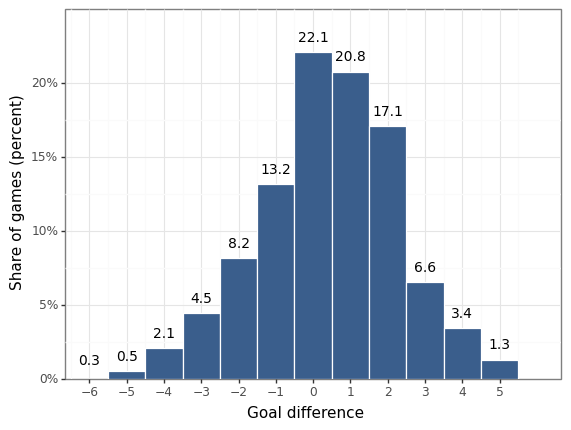

<ggplot: (143505232329)>

In [ ]:
ggplot(df, aes(x="home_goaladv", y="stat(count)/sum(stat(count))")) + geom_histogram(
    fill=color[0], color="white", binwidth=1,
) + geom_text(
    aes(label="[round(x,1) for x in stat(count)/sum(stat(count))*100]"),
    stat="count",
    size=10,
    nudge_y=0.01,
) + labs(
    x="Goal difference", y="Share of games (percent)"
) + scale_x_continuous(
    expand=(0.05, 0.05), limits=(-6, 6), breaks=seq(-6, 6, by=1)
) + scale_y_continuous(
    expand=(0, 0),
    limits=(0, 0.25),
    breaks=seq(0, 0.25, by=0.05),
    labels=percent_format(),
) + theme_bw()

<p>As we can see, the histogram confirms the advantage that the home team enjoys in matches. While the most frequent observation - the mode -  is zero (22.1%), the positive value is more frequent than the negative value - that is, the home team wins more games. As such, almost half of the games are won by the home team. If we add the number of draw games to this percentage, we can also conclude that the home team only loses in 30% of the matches, roughly.</p>
<p>The author went further and provided an in interesting table in his notes. It describes the goal advantage by team. Let's reproduce it here.</p>

In [15]:
df.loc[
    lambda x: x["team_home"].isin(
        ["Chelsea", "Arsenal", "Leicester", "Stoke", "West Ham"]
    )
].groupby(by="team_home").agg(
    Count=("home_goaladv", "size"),
    Mean=("home_goaladv", np.mean),
    Median=("home_goaladv", np.median),
    Std=("home_goaladv", np.std),
    Min=("home_goaladv", min),
)

Count      Mean  Median       Std  Min
team_home                                        
Arsenal       19  1.210526     1.0  1.182227   -1
Chelsea       19  2.000000     2.0  1.563472   -1
Leicester     19  0.315789     1.0  2.237375   -5
Stoke         19  0.000000     0.0  1.855921   -4
West Ham      19 -0.631579     0.0  2.033348   -4

<p>Here, we can do many observations. For instance, Arsenal has a 1.21 average goal difference when playing at home. Its standard deviation is pretty close - 1.18 - , which means that we can expect less dispersion and therefore a higher probability that Arsenal will win its matches by a 1.21 goal difference. If we take the median as the exact half of the distribution, we can further argue that we are talking about a pretty normal distribution. Also, given the minimum goal difference being -1, we can also observe that Arsenal, when it lost as team home, lost by a 1 goal difference. All in all, we can argue that the team performs well, returning stable results. Chelsea, on the other hand, has a mean of 2 goals and a standard distribution of 1.56. While the team is likely to score more goals, a higher standard distribution indicates higher data dispersion and therefore a higher probability of observing more extreme values. Such statement becomes more evident when analyzing Leicester's statistics: the team presents a lower mean value, 0.315, and a higher standard deviation, 2.23. If we consider its min goal difference, -5, we can see why: this team has lost at least one match with a high goal difference, which affected the mean and the standard deviation. The median, on the other hand, remains the same as Arsenal's, which reflects an intrinsic quality of this statistics - it is robust to extrem values.</p>

In [33]:
df.loc[
    lambda x: x["team_home"].isin(
        ["Chelsea", "Arsenal", "Leicester", "Stoke", "West Ham"]
    ),
    "home_goaladv",
].describe()

count    95.000000
mean      0.578947
std       2.003077
min      -5.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: home_goaladv, dtype: float64

<p>And that's it. That was a great lesson on how to explore data. Even (or even more) in football, we can apply many useful methods that help us understand the importance of getting acquainted with the data before trying to mine it.</p>
<hr>